In [2]:
library(igraph)


Attaching package: ‘igraph’

The following objects are masked from ‘package:stats’:

    decompose, spectrum

The following object is masked from ‘package:base’:

    union



## Generating Random Networks

## 2. Create networks using preferential attachment model

### a b c d

In [79]:
##check if its simple_pa
set.seed(12345)
connected_cnt=0 
for(i in 1:1000){
    g = barabasi.game(1000, m=1, directed=F)
    if(is.connected(g)){
        connected_cnt = connected_cnt +1
    }
}
cat("isConnected probability",connected_cnt/1000,"\n")

isConnected probability 1 


In [81]:
set.seed(12345)
g = barabasi.game(1000, m=1, directed=F)
fg <- fastgreedy.community(g)
modularity(fg)
set.seed(12345)
g = barabasi.game(10000, m=1, directed=F)
fg <- fastgreedy.community(g)
modularity(fg)

[1] 0.9357195

[1] 0.9789493

[1] 10000


Warning message in xy.coords(x, y, xlabel, ylabel, log):
“16 y values <= 0 omitted from logarithmic plot”

[1] 1000


Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“"log" is not a graphical parameter”

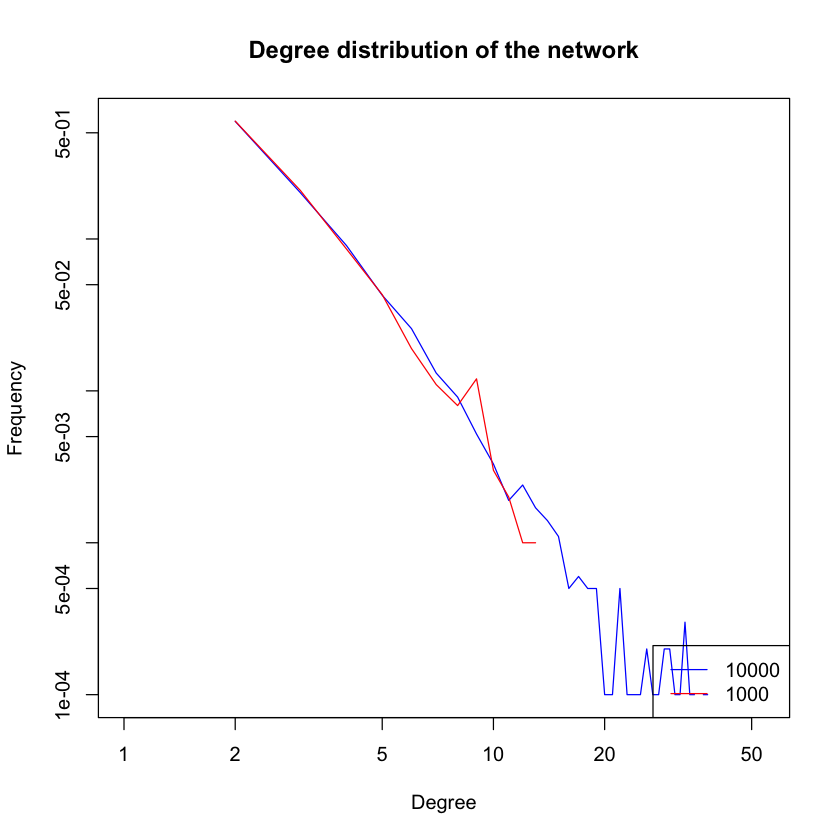

In [9]:
set.seed(234)
g = barabasi.game(10000, m=1, directed=F)
g.components <- clusters(g)
ix <- which.max(g.components$csize)
g.giant <- induced.subgraph(g, which(g.components$membership == ix))
print(vcount(g.giant))
fg <- fastgreedy.community(g)
plot(col='blue',degree.distribution(g),main="Degree distribution of the network",xlab="Degree",ylab="Frequency",log='xy',type='l')
g = barabasi.game(1000, m=1, directed=F)
g.components <- clusters(g)
ix <- which.max(g.components$csize)
g.giant <- induced.subgraph(g, which(g.components$membership == ix))
print(vcount(g.giant))
fg <- fastgreedy.community(g)
lines(col='red',degree.distribution(g),xlab="Degree",ylab="Frequency",log='xy',type='l')
legend("bottomright", legend=c(10000,1000),col=c('blue','red'), lwd=1)


   [1]  6  3  5  7 11  1  2 31 15 26  8  8 20  9 21  4 24  1 11 27 30 27  2 11
  [25]  2  4  9 13 24 22 16  8  2  6  7 27 15 15 16 10 27  5 22 14 10 16  2 15
  [49]  3  3  3  4  3 10 26 18 27 30 15  5  1  2 19 15 19 14 12  2 15 11  6 14
  [73] 22 13 29  4  3 16 13 22 16  1 23  2  6  6 11  4 12  2 14 17 23  2  5 10
  [97]  1 15 19 14  7 13 24  3 28  3  5 17 30  4  4  8 18 22 29 22 23  7 22 27
 [121]  6 11 10 15 25  6 29 17  7  8 30  2  3 13 19 13 25 18 23  8 11 24 30  2
 [145]  4 13 15 23 13 27 13 15 22 12  8 27 24  8 17  3 25 16 28 16  8 10 14 19
 [169] 14  9  8 15  8  4 22  7 16 23 30 17  7 18  4 10  1 22 23 18 14  8  4 21
 [193] 17 28 15 16 21  6  2 30 24 12  5 15  8 13 22  8  2 11 17 29 16  6 26  2
 [217] 21 14 10  2 18  1 26 26 31 17 21 25 21 11  3  8 14 28  1 25 13 17 14 17
 [241] 23 19 18 26 29 15 25 23 17 24 18 23  9 17  5 16 29 12  3 11 20 17 18 30
 [265] 21 14  3 31 20 28 20  3 24 26 11 26  4 13  7  5  1 31  4 12  8  3 16 16
 [289]  2  8  4 18 16 26  1 15  6  3 18  7 17  3 11 

Community sizes
 1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24 25 26 
43 41 45 45 41 39 35 38 37 37 36 36 37 36 39 33 32 30 29 27 28 28 29 27 28 22 
27 28 29 30 31 
22 22 22 21 15 

[1] 31


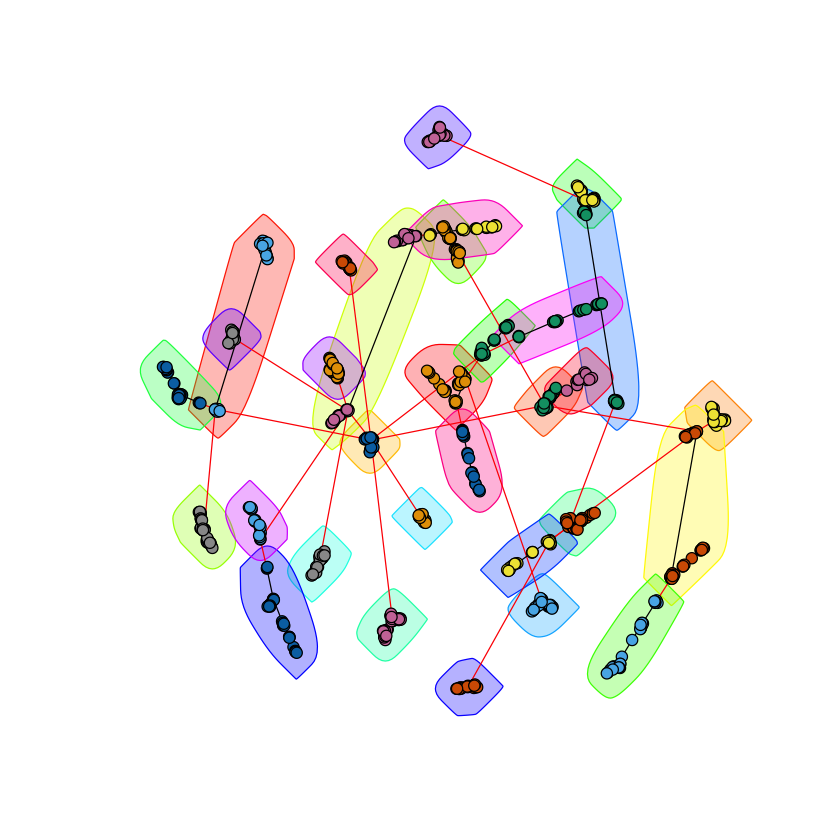

In [20]:
fc <- cluster_fast_greedy(g)
membership(fc)
sizes(fc)
g.com <- fastgreedy.community(g)
V(g)$color <- g.com$membership + 1
print(length(g.com))
plot(fc,g,vertex.size=4,vertex.label.cex=0.01)


### E  You can randomly pick a node i, and then randomly pick a neighbor j of that node. Plot the degree distribution of nodes j that are picked with this process, in the log-log scale. How does this differ from the node degree distribution?

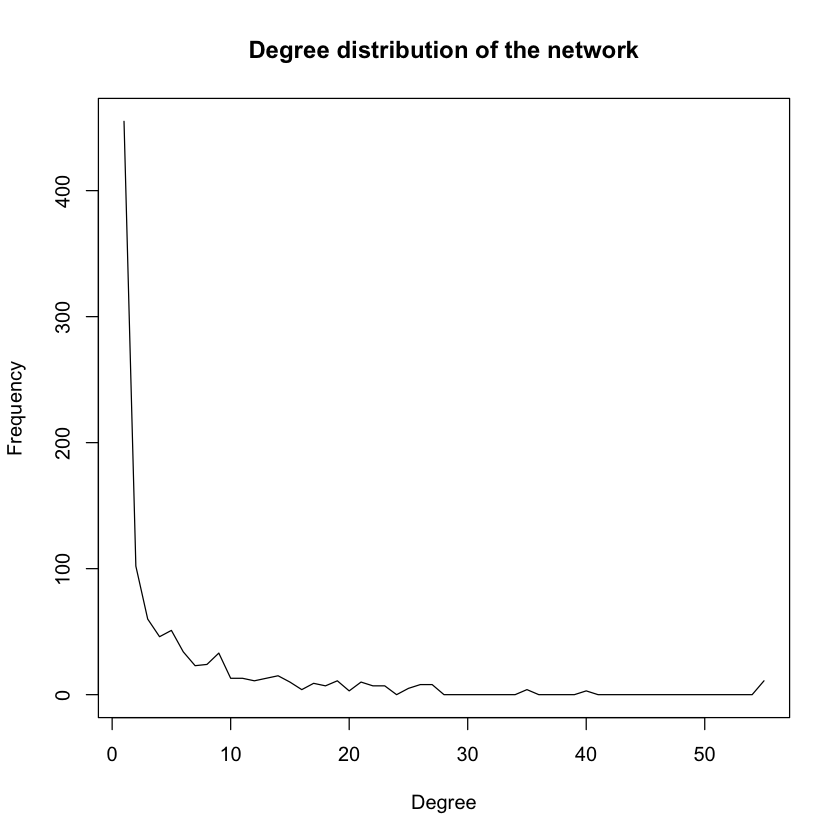

In [99]:
gsize = 10000
g = barabasi.game(gsize, m=1, directed=F)
degreesVector <- degree(g)
degreel = c()
for (v in sample(1:1000,1000)){
    neighs = neighbors(g,v)
    degree_ = 0
    if(length(neighs)>0){
        neigh2 = sample(neighs,1)
        degree_ = degree(g,neigh2)
    }
    degreel = c(degreel, degree_)
    
}
h <- hist(degreel, plot=F, breaks=max(degreel)-min(degreel)+1)
plot(h$counts,main="Degree distribution of the network",type = 'l',xlab="Degree",ylab="Frequency")


### F Estimate the expected degree of a node that is added at time step i for 1 ≤ i ≤ 1000. Show the relationship between the age of nodes and their expected degree through an appropriate plot

In [3]:
deg_dst_age <- function(mval){
    set.seed(12345)
    gsize =10000
    dg_sum = rep(0,gsize)
    modu = 0
    for(i in c(1:1000)){
       g = barabasi.game(gsize, m=mval, directed=F)
       dg_sum = dg_sum + degree(g)
        
    }
    fg <- fastgreedy.community(g)
    cat("Expected modularity :",modularity(fg)/1000,"\n")
    plot(dg_sum/1000, main="Degree distribution of the network",xlab="Degree",ylab="Frequency",log='xy')
    plot(dg_sum/1000,main="Degree distribution of the network",xlab="Degree",ylab="Frequency",log='xy', type='l')
}

Expected modularity : 0.0009769708 


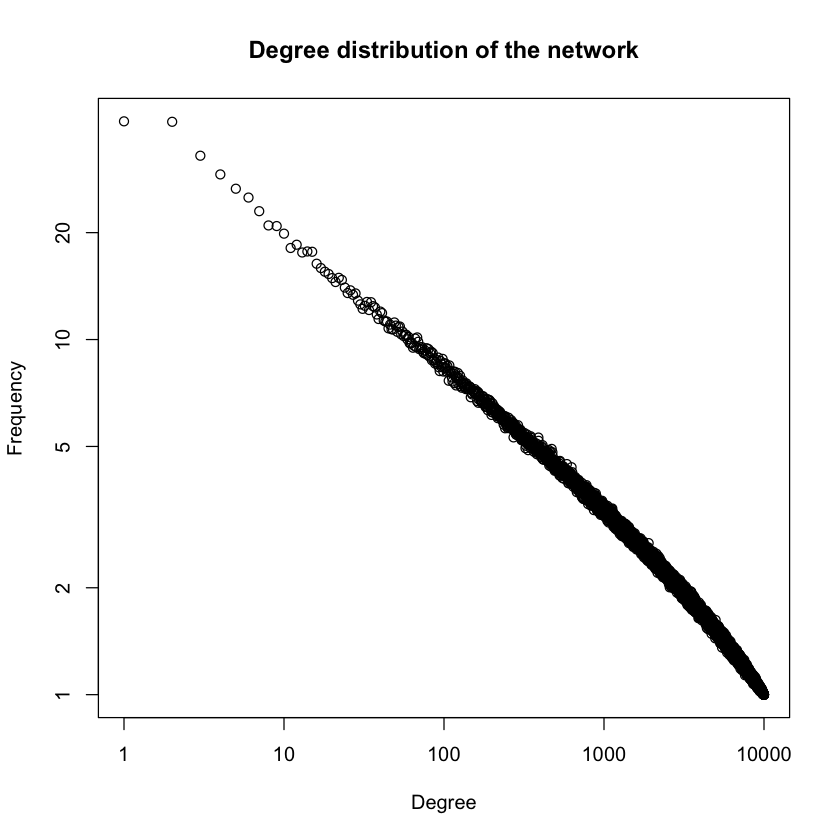

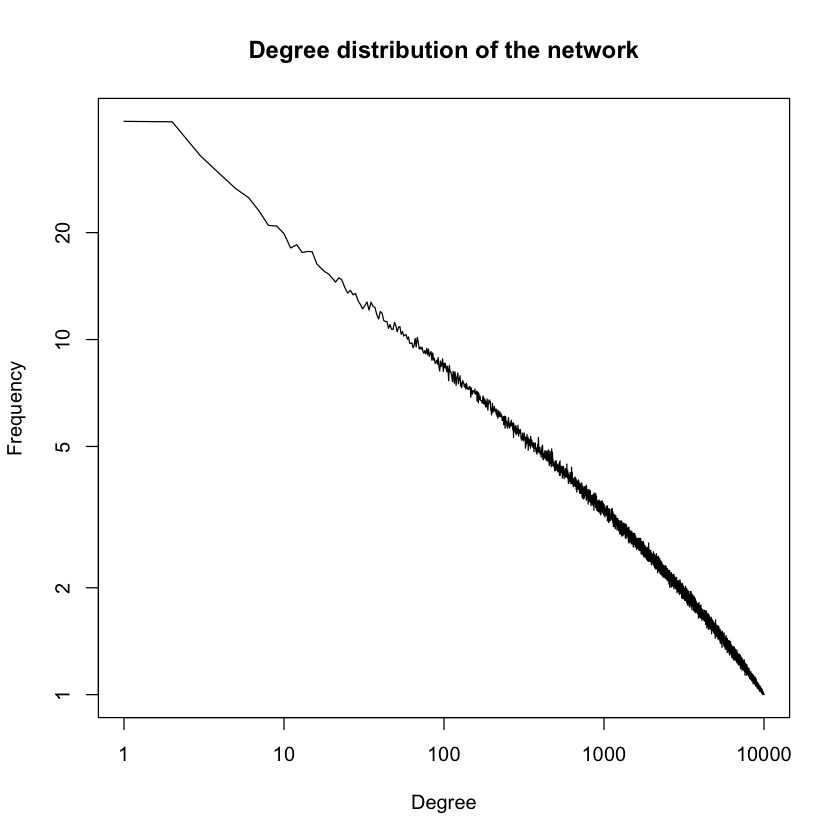

In [6]:
deg_dst_age(1)

Expected modularity : 0.0005336458 


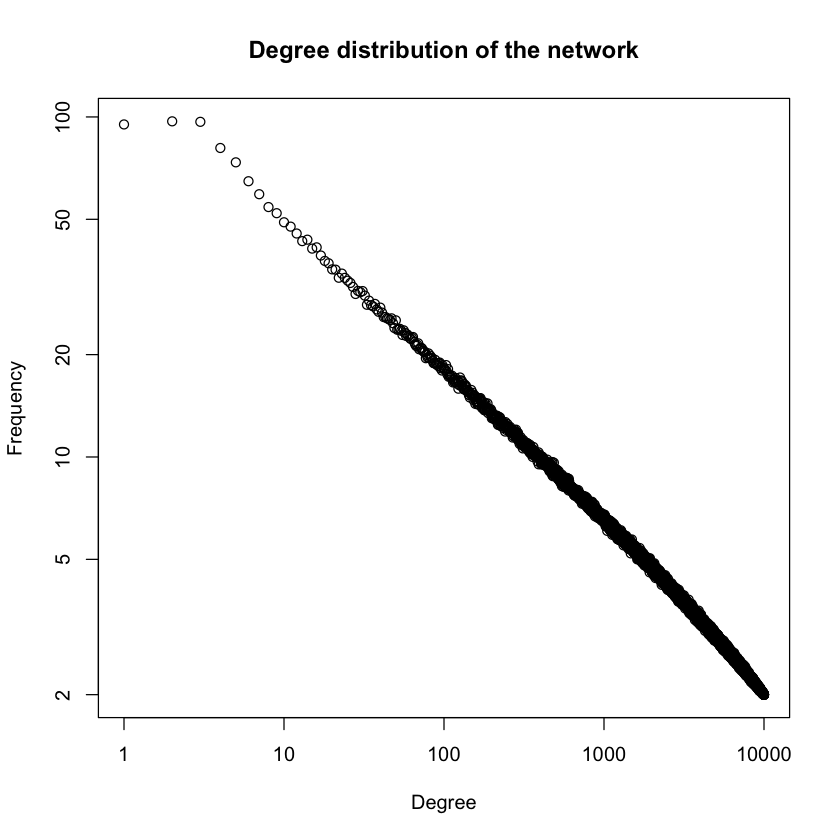

Expected modularity : 0.0002729816 


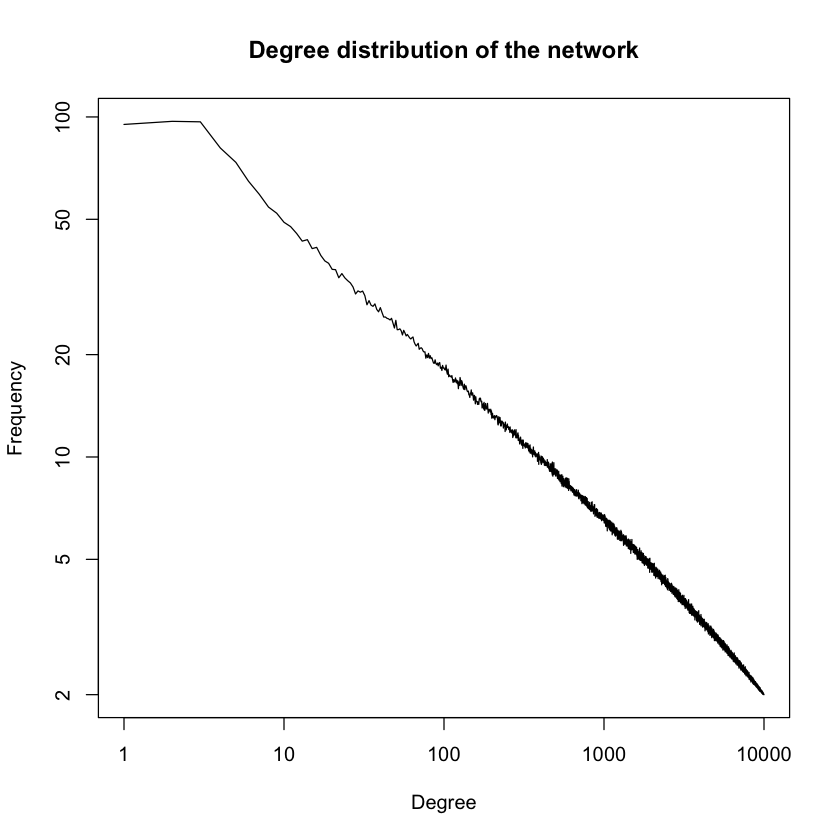

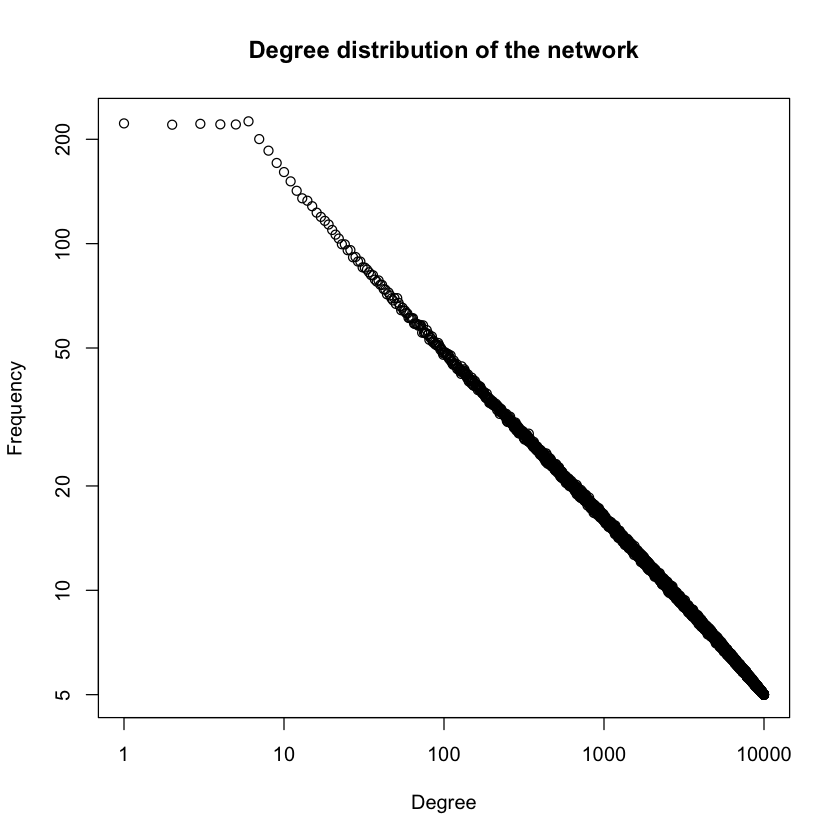

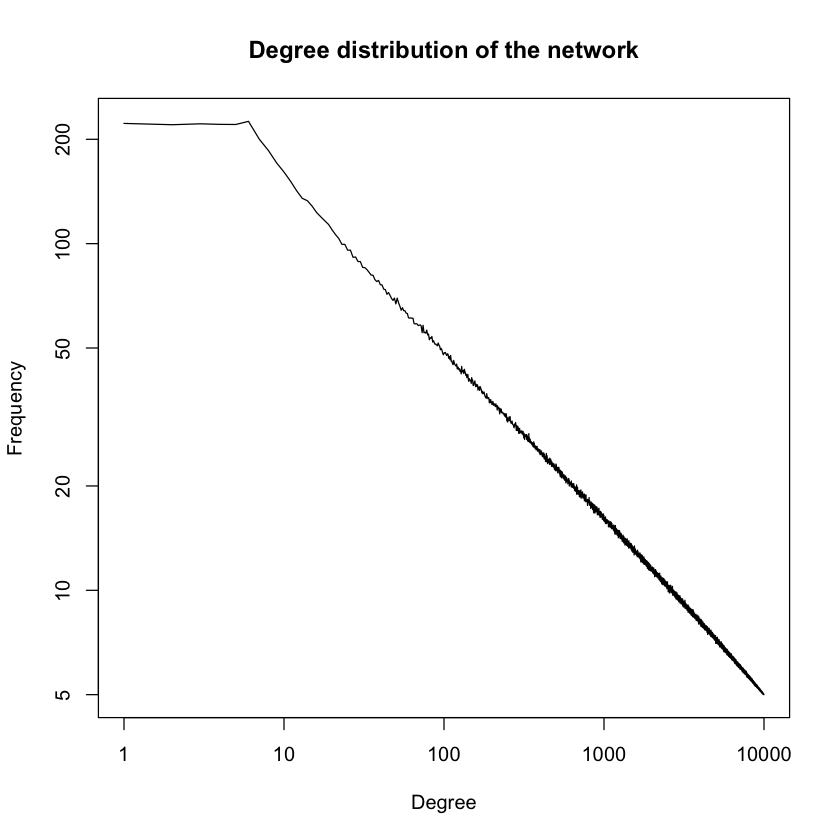

In [7]:
deg_dst_age(2)
deg_dst_age(5)

### G Again, generate a preferential attachment network with n = 1000, m = 1. Take its degree sequence and create a new net- work with the same degree sequence, through stub-matching procedure. Plot both networks, mark communities on their plots, and measure their modularity. Compare the two pro- cedures for creating random power-law networks.

In [2]:
set.seed(12345)
g = barabasi.game(1000, m=1, directed=F)
fg <- fastgreedy.community(g)
modularity(fg)


[1] 0.9357195

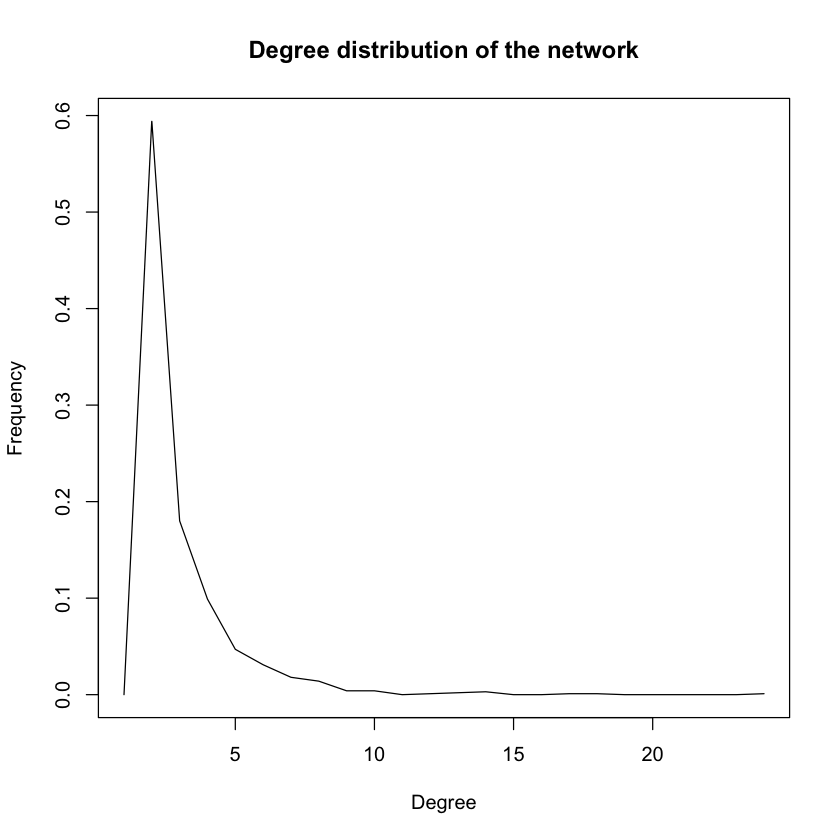

In [3]:
g2 = degree.sequence.game(degree(g),method =c("vl"))
plot(degree.distribution(g2),main="Degree distribution of the network",type = 'l',xlab="Degree",ylab="Frequency")

[1] 31


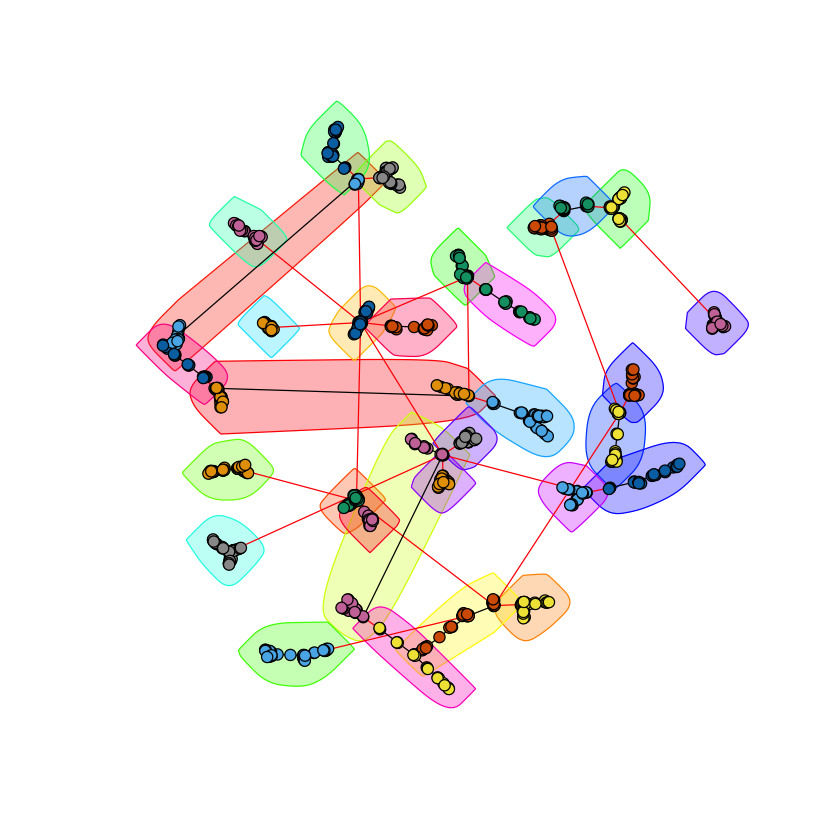

In [19]:
g.com <- fastgreedy.community(g)
V(g)$color <- g.com$membership + 1
c1 = cluster_fast_greedy(g)
print(length(g.com))
plot(c1,g,vertex.size=4,vertex.label.cex=0.01)


[1] 33


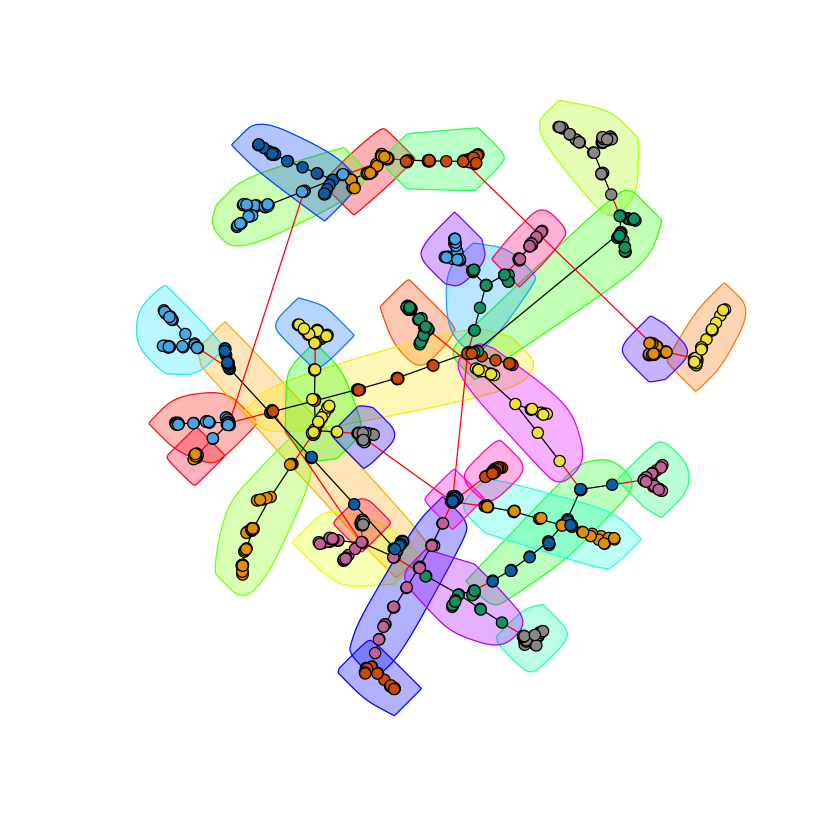

In [18]:
g2.com <- fastgreedy.community(g2)
c1 = cluster_fast_greedy(g2)
V(g2)$color <- g2.com$membership + 1
print(length(g2.com))
plot(c1,g2,vertex.size=4,vertex.label.cex=0.01)
